In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from IPython.display import HTML

In [2]:
from sklearn.metrics import f1_score, roc_auc_score, average_precision_score, precision_score, recall_score
import pandas
import numpy as np
import papermill as pm
import json
import matplotlib.pyplot as plt
import os
import uuid
from db import Result
import ast
import math
import scrapbook as sb
#from vis.visualization import visualize_cam, visualize_saliency, overlay
#from vis.utils.utils import load_img, normalize, find_layer_idx


pandas.options.display.float_format = '{:,.3f}'.format#

In [3]:
from evaluate import plot_learning_curve, plot_accuracy_curve, load, get_results, get_labels, transform_binary_probabilities, transform_binary_predictions, calculate_accuracy_loss, plot_confusion_matrix, plot_precision_recall, plot_roc_curve, calculate_pr_auc, calculate_confusion_matrix_stats, calculate_confusion_matrix, plot_precision_recall#, plot_tsne, plot_multiple_grad_cam

Using TensorFlow backend.
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint1

In [4]:
from data_gen import data
from run import characterize_data
from config import config

In [5]:
UUID = "772c9d29-1c8b-4f8d-a17a-1882e54ec221"
SELECTIONS = "None"
TSNE_PERPLEXITY = 5

In [6]:
SELECTIONS = eval(SELECTIONS)

# Learning Curve

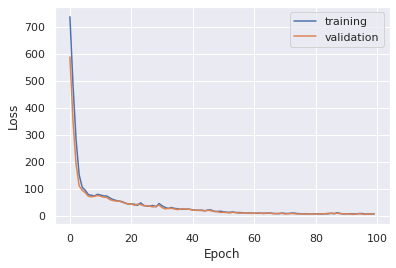

In [7]:
result = Result.query.filter(Result.uuid == UUID).first()
fig = plot_learning_curve(result)
fig.savefig("figures/learning_curves/{}-learning_curve.svg".format(UUID))

# Accuracy Trend

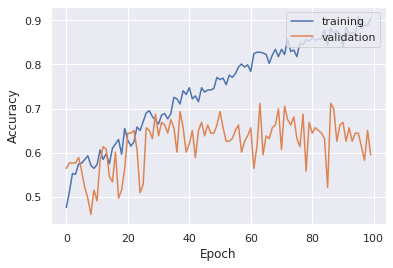

In [8]:
fig = plot_accuracy_curve(result)
fig.savefig("figures/accuracy/{}-accuracy.svg".format(UUID))

In [9]:
print("input form:", result.input_form)

input form: t2


In [10]:
MODEL = "{}/models/{}-{}.h5".format(config.OUTPUT, UUID, result.model)

In [11]:
train, validation, test, external = data(seed=uuid.UUID(result.split_seed), label_form=result.label_form, input_form=result.input_form, train_shuffle=False, test_shuffle=False, validation_shuffle=False, train_augment=False, validation_augment=False, test_augment=False)

  0%|          | 0/597 [00:00<?, ?it/s]

Training points = 597
Benign: 347, Intermediate: 250, Malignant: 0

Validation points = 163
Benign: 98, Intermediate: 65, Malignant: 0

Testing points = 92
Benign: 53, Intermediate: 39, Malignant: 0
bone-china-002
I'm doing the thing.


  1%|          | 3/597 [00:00<01:46,  5.57it/s]

bone-china-004
I'm doing the thing.
bone-china-005
I'm doing the thing.
bone-china-006
I'm doing the thing.


  1%|          | 4/597 [00:00<01:38,  6.01it/s]

bone-china-008
I'm doing the thing.


  1%|          | 6/597 [00:00<01:46,  5.54it/s]

bone-china-009
I'm doing the thing.
bone-china-010
I'm doing the thing.


  1%|▏         | 8/597 [00:01<01:44,  5.63it/s]

bone-china-014
I'm doing the thing.
bone-china-015
I'm doing the thing.


  2%|▏         | 11/597 [00:01<01:27,  6.69it/s]

bone-china-019
I'm doing the thing.
bone-china-020
I'm doing the thing.
bone-china-021
I'm doing the thing.
bone-china-022
I'm doing the thing.


  2%|▏         | 14/597 [00:02<01:24,  6.87it/s]

bone-china-023
I'm doing the thing.
bone-china-027
I'm doing the thing.


  3%|▎         | 16/597 [00:02<01:17,  7.49it/s]

bone-china-028
I'm doing the thing.
bone-china-029
I'm doing the thing.
bone-china-031
I'm doing the thing.


  3%|▎         | 20/597 [00:02<01:04,  8.88it/s]

bone-china-032
I'm doing the thing.
bone-china-033
I'm doing the thing.
bone-china-035
I'm doing the thing.


  4%|▎         | 22/597 [00:02<01:13,  7.81it/s]

bone-china-037
I'm doing the thing.
bone-china-038
I'm doing the thing.


  4%|▍         | 23/597 [00:03<01:25,  6.75it/s]

bone-china-039
I'm doing the thing.


  4%|▍         | 24/597 [00:03<01:36,  5.94it/s]

bone-china-041
I'm doing the thing.


  4%|▍         | 25/597 [00:03<01:45,  5.43it/s]

bone-china-042
I'm doing the thing.


  5%|▍         | 27/597 [00:04<01:56,  4.90it/s]

bone-china-044
I'm doing the thing.


  5%|▍         | 28/597 [00:04<01:38,  5.77it/s]

bone-china-045
I'm doing the thing.
bone-china-046
I'm doing the thing.


  5%|▌         | 30/597 [00:04<01:36,  5.90it/s]

bone-china-047
I'm doing the thing.
bone-china-050
I'm doing the thing.
bone-china-051
I'm doing the thing.


  6%|▌         | 34/597 [00:04<01:08,  8.19it/s]

bone-china-052
I'm doing the thing.
bone-china-053
I'm doing the thing.
bone-china-055
I'm doing the thing.


  6%|▌         | 36/597 [00:05<01:06,  8.41it/s]

bone-china-056
I'm doing the thing.
bone-china-058
I'm doing the thing.


  6%|▋         | 38/597 [00:05<01:46,  5.26it/s]

bone-china-059
I'm doing the thing.
bone-china-060
I'm doing the thing.


  7%|▋         | 39/597 [00:05<01:31,  6.09it/s]

bone-china-061
I'm doing the thing.
bone-china-062
I'm doing the thing.


  7%|▋         | 41/597 [00:06<01:31,  6.08it/s]

bone-china-065
I'm doing the thing.


  7%|▋         | 43/597 [00:06<01:30,  6.10it/s]

bone-china-066
I'm doing the thing.
bone-china-068
I'm doing the thing.


  8%|▊         | 45/597 [00:06<01:31,  6.03it/s]

bone-china-069
I'm doing the thing.
bone-china-070
I'm doing the thing.


  8%|▊         | 47/597 [00:07<01:22,  6.66it/s]

bone-china-071
I'm doing the thing.
bone-china-072
I'm doing the thing.


  8%|▊         | 49/597 [00:07<01:18,  6.95it/s]

bone-china-074
I'm doing the thing.
bone-china-075
I'm doing the thing.


  8%|▊         | 50/597 [00:07<01:15,  7.20it/s]

bone-china-076
I'm doing the thing.


  9%|▊         | 52/597 [00:07<01:47,  5.08it/s]

bone-china-079
I'm doing the thing.
bone-china-080
I'm doing the thing.


  9%|▉         | 53/597 [00:08<01:36,  5.62it/s]

bone-china-081
I'm doing the thing.


  9%|▉         | 55/597 [00:08<01:43,  5.22it/s]

bone-china-083
I'm doing the thing.
bone-china-084
I'm doing the thing.


 10%|▉         | 57/597 [00:08<01:33,  5.74it/s]

bone-china-085
I'm doing the thing.
bone-china-086
I'm doing the thing.


 10%|▉         | 58/597 [00:09<01:45,  5.13it/s]

bone-china-087
I'm doing the thing.
bone-china-088
I'm doing the thing.


 10%|█         | 62/597 [00:09<01:25,  6.23it/s]

bone-china-089
I'm doing the thing.
bone-china-092
I'm doing the thing.
bone-china-093
I'm doing the thing.


 11%|█         | 63/597 [00:09<01:29,  5.95it/s]

bone-china-099
I'm doing the thing.
bone-china-100
I'm doing the thing.


 11%|█         | 66/597 [00:10<01:17,  6.86it/s]

bone-china-101
I'm doing the thing.
bone-china-103
I'm doing the thing.
bone-china-104
I'm doing the thing.


 12%|█▏        | 69/597 [00:10<01:13,  7.15it/s]

bone-china-105
I'm doing the thing.
bone-china-107
I'm doing the thing.


 12%|█▏        | 70/597 [00:10<01:24,  6.23it/s]

bone-china-109
I'm doing the thing.
bone-china-110
I'm doing the thing.


 12%|█▏        | 72/597 [00:11<01:23,  6.31it/s]

bone-china-113
I'm doing the thing.


 12%|█▏        | 74/597 [00:11<01:39,  5.27it/s]

bone-china-114
I'm doing the thing.
bone-china-115
I'm doing the thing.


 13%|█▎        | 75/597 [00:11<01:38,  5.32it/s]

bone-china-117
I'm doing the thing.
bone-china-118
I'm doing the thing.


 13%|█▎        | 78/597 [00:12<01:31,  5.69it/s]

bone-china-121
I'm doing the thing.
bone-china-122
I'm doing the thing.


 13%|█▎        | 80/597 [00:12<01:27,  5.94it/s]

bone-china-123
I'm doing the thing.
bone-china-124
I'm doing the thing.


 14%|█▎        | 81/597 [00:12<01:22,  6.24it/s]

bone-china-125
I'm doing the thing.
bone-china-126
I'm doing the thing.


 14%|█▍        | 84/597 [00:13<01:16,  6.68it/s]

bone-china-127
I'm doing the thing.
bone-china-131
I'm doing the thing.


 14%|█▍        | 86/597 [00:13<01:23,  6.15it/s]

bone-china-132
I'm doing the thing.
bone-china-133
I'm doing the thing.


 15%|█▍        | 87/597 [00:13<01:26,  5.90it/s]

bone-china-134
I'm doing the thing.


 15%|█▍        | 89/597 [00:14<01:28,  5.72it/s]

bone-china-135
I'm doing the thing.
bone-china-136
I'm doing the thing.
bone-china-138
I'm doing the thing.


 15%|█▌        | 92/597 [00:14<01:17,  6.52it/s]

bone-china-140
I'm doing the thing.
bone-china-143
I'm doing the thing.


 16%|█▌        | 93/597 [00:14<01:15,  6.66it/s]

bone-china-145
I'm doing the thing.


 16%|█▌        | 95/597 [00:14<01:32,  5.44it/s]

bone-china-146
I'm doing the thing.
bone-china-148
I'm doing the thing.


 16%|█▌        | 97/597 [00:15<01:17,  6.46it/s]

bone-china-149
I'm doing the thing.
bone-china-152
I'm doing the thing.


 17%|█▋        | 99/597 [00:15<01:10,  7.10it/s]

bone-china-153
I'm doing the thing.
bone-china-154
I'm doing the thing.
bone-china-158
I'm doing the thing.


 17%|█▋        | 102/597 [00:15<01:08,  7.25it/s]

bone-china-159
I'm doing the thing.
bone-china-160
I'm doing the thing.


 17%|█▋        | 103/597 [00:16<01:20,  6.13it/s]

bone-china-161
I'm doing the thing.
bone-china-164
I'm doing the thing.


 18%|█▊        | 106/597 [00:16<01:14,  6.62it/s]

bone-china-166
I'm doing the thing.
bone-china-167
I'm doing the thing.


 18%|█▊        | 108/597 [00:16<01:03,  7.70it/s]

bone-china-169
I'm doing the thing.
bone-china-170
I'm doing the thing.


 18%|█▊        | 109/597 [00:16<01:05,  7.44it/s]

bone-china-174
I'm doing the thing.


 19%|█▊        | 111/597 [00:17<01:23,  5.82it/s]

bone-china-175
I'm doing the thing.
bone-china-176
I'm doing the thing.


 19%|█▉        | 113/597 [00:17<01:16,  6.31it/s]

bone-china-177
I'm doing the thing.
bone-china-180
I'm doing the thing.


 19%|█▉        | 116/597 [00:17<01:03,  7.53it/s]

bone-china-184
I'm doing the thing.
bone-china-186
I'm doing the thing.
bone-china-187
I'm doing the thing.


 20%|█▉        | 117/597 [00:17<01:01,  7.84it/s]

bone-china-188
I'm doing the thing.


 20%|█▉        | 119/597 [00:18<01:07,  7.06it/s]

bone-china-189
I'm doing the thing.
bone-china-190
I'm doing the thing.


 20%|██        | 121/597 [00:18<01:08,  6.98it/s]

bone-china-192
I'm doing the thing.
bone-china-193
I'm doing the thing.


 21%|██        | 123/597 [00:18<01:14,  6.37it/s]

bone-china-194
I'm doing the thing.
bone-china-196
I'm doing the thing.


 21%|██        | 125/597 [00:19<01:08,  6.87it/s]

bone-china-198
I'm doing the thing.
bone-china-199
I'm doing the thing.


 21%|██▏       | 127/597 [00:19<01:05,  7.23it/s]

bone-china-203
I'm doing the thing.
bone-china-209
I'm doing the thing.


 21%|██▏       | 128/597 [00:19<01:03,  7.44it/s]

bone-china-212
I'm doing the thing.
bone-china-213
I'm doing the thing.


 22%|██▏       | 131/597 [00:19<01:01,  7.63it/s]

bone-china-215
I'm doing the thing.
bone-china-216
I'm doing the thing.
bone-china-217
I'm doing the thing.


 22%|██▏       | 133/597 [00:20<00:51,  9.01it/s]

bone-china-221
I'm doing the thing.
bone-china-222
I'm doing the thing.


 23%|██▎       | 135/597 [00:20<00:54,  8.47it/s]

bone-china-223
I'm doing the thing.


 23%|██▎       | 136/597 [00:20<01:10,  6.55it/s]

bone-china-225
I'm doing the thing.


 23%|██▎       | 137/597 [00:20<01:33,  4.94it/s]

bone-china-228
I'm doing the thing.


 23%|██▎       | 139/597 [00:21<01:34,  4.86it/s]

bone-china-231
I'm doing the thing.
bone-china-234
I'm doing the thing.


 23%|██▎       | 140/597 [00:21<01:35,  4.78it/s]

bone-china-242
I'm doing the thing.


 24%|██▎       | 141/597 [00:21<01:55,  3.96it/s]

bone-china-243
I'm doing the thing.


 24%|██▍       | 143/597 [00:22<01:36,  4.69it/s]

bone-penn-081
I'm doing the thing.
bone-penn-082
I'm doing the thing.


 24%|██▍       | 144/597 [00:22<01:38,  4.61it/s]

bone-penn-083
I'm doing the thing.


 24%|██▍       | 145/597 [00:22<01:59,  3.77it/s]

bone-penn-084
I'm doing the thing.


 25%|██▍       | 147/597 [00:23<02:13,  3.38it/s]

bone-penn-085
I'm doing the thing.
bone-penn-086
I'm doing the thing.


 25%|██▍       | 148/597 [00:24<02:40,  2.80it/s]

bone-penn-090
I'm doing the thing.


 25%|██▍       | 149/597 [00:24<02:22,  3.14it/s]

bone-penn-091
I'm doing the thing.
bone-penn-092
I'm doing the thing.


 26%|██▌       | 153/597 [00:24<01:30,  4.89it/s]

bone-penn-093
I'm doing the thing.
bone-penn-094
I'm doing the thing.
bone-penn-095
I'm doing the thing.


 26%|██▌       | 154/597 [00:24<01:17,  5.72it/s]

bone-penn-097
I'm doing the thing.


 26%|██▌       | 155/597 [00:25<02:24,  3.07it/s]

bone-penn-099
I'm doing the thing.


 26%|██▌       | 156/597 [00:26<03:13,  2.28it/s]

bone-penn-105
I'm doing the thing.


 26%|██▋       | 157/597 [00:26<03:05,  2.37it/s]

bone-penn-106
I'm doing the thing.


/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation
 26%|██▋       | 158/597 [00:26<02:53,  2.52it/s]

bone-penn-107
I'm doing the thing.


 27%|██▋       | 160/597 [00:27<02:16,  3.19it/s]

bone-penn-109
I'm doing the thing.
bone-penn-110
I'm doing the thing.


 27%|██▋       | 161/597 [00:28<02:51,  2.54it/s]

bone-penn-111
I'm doing the thing.


 27%|██▋       | 162/597 [00:28<03:06,  2.34it/s]

bone-penn-112
I'm doing the thing.


 27%|██▋       | 164/597 [00:30<04:03,  1.78it/s]

bone-penn-113
I'm doing the thing.
bone-penn-116
I'm doing the thing.


 28%|██▊       | 165/597 [00:30<03:15,  2.21it/s]

bone-penn-118
I'm doing the thing.


 28%|██▊       | 167/597 [00:32<04:46,  1.50it/s]

bone-penn-119
I'm doing the thing.
bone-penn-120
I'm doing the thing.


 28%|██▊       | 169/597 [00:32<03:14,  2.20it/s]

bone-penn-122
I'm doing the thing.
bone-penn-126
I'm doing the thing.


 28%|██▊       | 170/597 [00:33<03:36,  1.97it/s]

bone-penn-130
I'm doing the thing.


 29%|██▊       | 171/597 [00:33<03:01,  2.35it/s]

bone-penn-131
I'm doing the thing.


 29%|██▉       | 172/597 [00:34<03:03,  2.32it/s]

bone-penn-134
I'm doing the thing.


 29%|██▉       | 173/597 [00:34<03:06,  2.28it/s]

bone-penn-137
I'm doing the thing.


 29%|██▉       | 174/597 [00:35<03:26,  2.05it/s]

bone-penn-139
I'm doing the thing.


 29%|██▉       | 176/597 [00:35<02:34,  2.73it/s]

bone-penn-140
I'm doing the thing.
bone-penn-141
I'm doing the thing.


 30%|██▉       | 178/597 [00:36<02:05,  3.35it/s]

bone-penn-142
I'm doing the thing.
bone-penn-147
I'm doing the thing.


 30%|██▉       | 179/597 [00:36<02:31,  2.76it/s]

bone-penn-148
I'm doing the thing.


 30%|███       | 180/597 [00:37<02:28,  2.80it/s]

bone-penn-149
I'm doing the thing.


 30%|███       | 181/597 [00:37<02:13,  3.11it/s]

bone-penn-150
I'm doing the thing.


 30%|███       | 182/597 [00:37<02:34,  2.69it/s]

bone-penn-152
I'm doing the thing.


 31%|███       | 184/597 [00:38<02:26,  2.81it/s]

bone-penn-154
I'm doing the thing.
bone-penn-155
I'm doing the thing.


 31%|███       | 186/597 [00:38<01:59,  3.45it/s]

bone-penn-156
I'm doing the thing.
bone-penn-157

 31%|███▏      | 188/597 [00:39<01:38,  4.14it/s]


I'm doing the thing.
bone-penn-160
I'm doing the thing.
bone-penn-161
I'm doing the thing.


 32%|███▏      | 189/597 [00:39<01:27,  4.65it/s]

bone-penn-162
I'm doing the thing.


 32%|███▏      | 190/597 [00:39<01:36,  4.24it/s]

bone-penn-163
I'm doing the thing.


 32%|███▏      | 191/597 [00:40<01:41,  3.99it/s]

bone-penn-167
I'm doing the thing.


 32%|███▏      | 193/597 [00:40<01:49,  3.69it/s]

bone-penn-168
I'm doing the thing.
bone-penn-170
I'm doing the thing.


 32%|███▏      | 194/597 [00:41<02:00,  3.34it/s]

bone-penn-171
I'm doing the thing.


 33%|███▎      | 196/597 [00:41<01:41,  3.93it/s]

bone-penn-172
I'm doing the thing.
bone-penn-173
I'm doing the thing.


 33%|███▎      | 198/597 [00:41<01:14,  5.33it/s]

bone-penn-174
I'm doing the thing.
bone-penn-178
I'm doing the thing.


 33%|███▎      | 199/597 [00:42<01:31,  4.35it/s]

bone-penn-179
I'm doing the thing.


 34%|███▎      | 201/597 [00:42<01:56,  3.40it/s]

bone-penn-180
I'm doing the thing.
bone-penn-183
I'm doing the thing.


 34%|███▍      | 203/597 [00:43<01:26,  4.55it/s]

bone-penn-187
I'm doing the thing.
bone-penn-188
I'm doing the thing.


 34%|███▍      | 204/597 [00:43<01:12,  5.43it/s]

bone-penn-189
I'm doing the thing.


 34%|███▍      | 205/597 [00:43<01:55,  3.39it/s]

bone-penn-191
I'm doing the thing.


 35%|███▍      | 207/597 [00:44<01:28,  4.41it/s]

bone-penn-192
I'm doing the thing.
bone-penn-193
I'm doing the thing.


 35%|███▍      | 208/597 [00:44<01:41,  3.82it/s]

bone-penn-194
I'm doing the thing.


 35%|███▌      | 209/597 [00:45<03:35,  1.80it/s]

bone-penn-197
I'm doing the thing.


 35%|███▌      | 210/597 [00:46<03:07,  2.07it/s]

bone-penn-198
I'm doing the thing.


 35%|███▌      | 211/597 [00:46<02:38,  2.43it/s]

bone-penn-200
I'm doing the thing.


 36%|███▌      | 212/597 [00:46<02:15,  2.85it/s]

bone-penn-205
I'm doing the thing.


 36%|███▌      | 213/597 [00:49<06:31,  1.02s/it]

bone-penn-206
I'm doing the thing.
bone-penn-207
I'm doing the thing.


 36%|███▌      | 215/597 [00:49<04:52,  1.30it/s]

bone-penn-209
I'm doing the thing.


 36%|███▌      | 216/597 [00:49<04:11,  1.51it/s]

bone-penn-210
I'm doing the thing.


 36%|███▋      | 217/597 [00:50<03:20,  1.89it/s]

bone-penn-214
I'm doing the thing.


 37%|███▋      | 218/597 [00:50<02:59,  2.11it/s]

bone-penn-217
I'm doing the thing.


 37%|███▋      | 219/597 [00:50<02:37,  2.40it/s]

bone-penn-218
I'm doing the thing.


 37%|███▋      | 220/597 [00:51<02:44,  2.29it/s]

bone-penn-219
I'm doing the thing.
bone-penn-220
I'm doing the thing.


 37%|███▋      | 223/597 [00:51<01:45,  3.54it/s]

bone-penn-222
I'm doing the thing.
bone-penn-223
I'm doing the thing.


 38%|███▊      | 224/597 [00:52<02:19,  2.67it/s]

bone-penn-224
I'm doing the thing.
bone-penn-227
I'm doing the thing.


 38%|███▊      | 226/597 [00:52<01:54,  3.23it/s]

bone-penn-231
I'm doing the thing.


 38%|███▊      | 227/597 [00:53<02:40,  2.31it/s]

bone-penn-236
I'm doing the thing.


 38%|███▊      | 228/597 [00:53<02:33,  2.40it/s]

bone-penn-238
I'm doing the thing.


 38%|███▊      | 229/597 [00:53<02:16,  2.69it/s]

bone-penn-239
I'm doing the thing.


 39%|███▊      | 230/597 [00:54<02:01,  3.01it/s]

bone-penn-241
I'm doing the thing.


 39%|███▉      | 232/597 [00:54<01:50,  3.31it/s]

bone-penn-245
I'm doing the thing.
bone-penn-246
I'm doing the thing.


 39%|███▉      | 234/597 [00:54<01:25,  4.24it/s]

bone-penn-247
I'm doing the thing.
bone-penn-250
I'm doing the thing.


 39%|███▉      | 235/597 [00:55<01:26,  4.17it/s]

bone-penn-252
I'm doing the thing.
bone-penn-253
I'm doing the thing.


 40%|███▉      | 238/597 [00:55<01:08,  5.23it/s]

bone-penn-254
I'm doing the thing.
bone-penn-255
I'm doing the thing.


 40%|████      | 239/597 [00:55<01:15,  4.74it/s]

bone-penn-257
I'm doing the thing.
bone-penn-260
I'm doing the thing.


 40%|████      | 241/597 [00:56<01:11,  4.98it/s]

bone-penn-261
I'm doing the thing.
bone-penn-262
I'm doing the thing.


 41%|████      | 244/597 [00:56<00:58,  6.07it/s]

bone-penn-266
I'm doing the thing.
bone-penn-268
I'm doing the thing.
bone-penn-269
I'm doing the thing.
bone-penn-277
I'm doing the thing.


 41%|████▏     | 247/597 [00:57<00:57,  6.10it/s]

bone-penn-278
I'm doing the thing.


 42%|████▏     | 248/597 [00:57<01:09,  5.04it/s]

bone-penn-279
I'm doing the thing.


 42%|████▏     | 251/597 [00:57<01:13,  4.69it/s]

bone-penn-280
I'm doing the thing.
bone-penn-282
I'm doing the thing.
bone-penn-283
I'm doing the thing.


 42%|████▏     | 252/597 [00:58<01:22,  4.21it/s]

bone-penn-285
I'm doing the thing.


 42%|████▏     | 253/597 [00:58<01:46,  3.24it/s]

bone-penn-286
I'm doing the thing.
bone-penn-289
I'm doing the thing.


 43%|████▎     | 255/597 [00:59<01:28,  3.85it/s]

bone-penn-291
I'm doing the thing.
bone-penn-292
I'm doing the thing.


 43%|████▎     | 257/597 [00:59<01:13,  4.60it/s]

bone-penn-293
I'm doing the thing.
bone-penn-296
I'm doing the thing.


 44%|████▎     | 260/597 [00:59<01:02,  5.40it/s]

bone-penn-297
I'm doing the thing.
bone-penn-298
I'm doing the thing.


 44%|████▍     | 262/597 [01:00<00:53,  6.26it/s]

bone-penn-299
I'm doing the thing.
bone-penn-300
I'm doing the thing.


 44%|████▍     | 264/597 [01:00<00:45,  7.24it/s]

bone-penn-304
I'm doing the thing.
bone-penn-305
I'm doing the thing.


 44%|████▍     | 265/597 [01:00<00:42,  7.73it/s]

bone-penn-307
I'm doing the thing.


 45%|████▍     | 266/597 [01:00<00:58,  5.61it/s]

bone-penn-311
I'm doing the thing.


 45%|████▍     | 267/597 [01:00<01:17,  4.24it/s]

bone-penn-312
I'm doing the thing.


 45%|████▍     | 268/597 [01:01<01:35,  3.46it/s]

bone-penn-313
I'm doing the thing.


 45%|████▌     | 269/597 [01:01<01:40,  3.26it/s]

bone-penn-314
I'm doing the thing.


 45%|████▌     | 271/597 [01:02<01:24,  3.86it/s]

bone-penn-316
I'm doing the thing.
bone-penn-317
I'm doing the thing.
bone-penn-319
I'm doing the thing.


 46%|████▌     | 275/597 [01:02<00:52,  6.08it/s]

bone-penn-320
I'm doing the thing.
bone-penn-322
I'm doing the thing.
bone-penn-328
I'm doing the thing.
bone-penn-330
I'm doing the thing.


 46%|████▋     | 277/597 [01:02<00:55,  5.74it/s]

bone-penn-332
I'm doing the thing.


 47%|████▋     | 278/597 [01:03<01:05,  4.91it/s]

bone-penn-335
I'm doing the thing.


 47%|████▋     | 281/597 [01:03<01:02,  5.07it/s]

bone-penn-337
I'm doing the thing.
bone-penn-338
I'm doing the thing.
bone-penn-339
I'm doing the thing.


 47%|████▋     | 283/597 [01:04<00:59,  5.26it/s]

bone-penn-340
I'm doing the thing.
bone-penn-341
I'm doing the thing.


 48%|████▊     | 285/597 [01:04<01:01,  5.08it/s]

bone-penn-342
I'm doing the thing.
bone-penn-343
I'm doing the thing.


 48%|████▊     | 287/597 [01:04<00:49,  6.21it/s]

bone-penn-345
I'm doing the thing.
bone-penn-346
I'm doing the thing.
bone-penn-347
I'm doing the thing.


 49%|████▊     | 291/597 [01:04<00:35,  8.56it/s]

bone-penn-348
I'm doing the thing.
bone-penn-349
I'm doing the thing.
bone-penn-356
I'm doing the thing.
bone-penn-362
I'm doing the thing.


 49%|████▉     | 293/597 [01:05<01:04,  4.74it/s]

bone-penn-363
I'm doing the thing.


 49%|████▉     | 294/597 [01:06<01:25,  3.53it/s]

bone-penn-364
I'm doing the thing.


 50%|████▉     | 297/597 [01:06<01:12,  4.13it/s]

bone-penn-367
I'm doing the thing.
bone-penn-368
I'm doing the thing.
bone-penn-369
I'm doing the thing.


 50%|█████     | 299/597 [01:07<00:59,  4.98it/s]

bone-penn-370
I'm doing the thing.
bone-penn-372
I'm doing the thing.


 50%|█████     | 301/597 [01:07<00:59,  5.01it/s]

bone-penn-374
I'm doing the thing.
bone-penn-375
I'm doing the thing.


 51%|█████     | 303/597 [01:07<00:45,  6.41it/s]

bone-penn-379
I'm doing the thing.
bone-penn-380
I'm doing the thing.


 51%|█████     | 305/597 [01:08<00:47,  6.21it/s]

bone-penn-382
I'm doing the thing.
bone-penn-384
I'm doing the thing.
bone-penn-385
I'm doing the thing.


 51%|█████▏    | 307/597 [01:08<00:51,  5.58it/s]

bone-penn-386
I'm doing the thing.


 52%|█████▏    | 308/597 [01:08<01:07,  4.29it/s]

bone-penn-388
I'm doing the thing.
bone-penn-391
I'm doing the thing.


 52%|█████▏    | 310/597 [01:09<00:56,  5.09it/s]

bone-penn-392
I'm doing the thing.


 52%|█████▏    | 311/597 [01:09<01:13,  3.89it/s]

bone-penn-396
I'm doing the thing.


 52%|█████▏    | 312/597 [01:09<01:34,  3.03it/s]

bone-penn-397
I'm doing the thing.


 53%|█████▎    | 314/597 [01:10<01:32,  3.07it/s]

bone-penn-405
I'm doing the thing.
bone-penn-413
I'm doing the thing.


 53%|█████▎    | 315/597 [01:10<01:14,  3.77it/s]

bone-penn-425
I'm doing the thing.


 53%|█████▎    | 316/597 [01:11<01:26,  3.23it/s]

bone-penn-429
I'm doing the thing.


 53%|█████▎    | 317/597 [01:11<01:24,  3.31it/s]

bone-penn-433
I'm doing the thing.


 53%|█████▎    | 319/597 [01:12<01:35,  2.91it/s]

bone-penn-435
I'm doing the thing.
bone-penn-446
I'm doing the thing.


 54%|█████▎    | 320/597 [01:12<01:24,  3.29it/s]

bone-penn-453
I'm doing the thing.


 54%|█████▍    | 323/597 [01:12<00:59,  4.58it/s]

bone-penn-454
I'm doing the thing.
bone-penn-457
I'm doing the thing.
bone-penn-458
I'm doing the thing.


 54%|█████▍    | 324/597 [01:13<01:11,  3.84it/s]

bone-penn-459
I'm doing the thing.
bone-penn-460
I'm doing the thing.


 55%|█████▍    | 326/597 [01:13<00:58,  4.67it/s]

bone-penn-461
I'm doing the thing.


 55%|█████▍    | 328/597 [01:13<00:57,  4.70it/s]

bone-penn-463
I'm doing the thing.
bone-penn-465
I'm doing the thing.


 55%|█████▌    | 330/597 [01:14<01:12,  3.70it/s]

bone-penn-467
I'm doing the thing.
bone-penn-471
I'm doing the thing.


 56%|█████▌    | 333/597 [01:14<00:46,  5.70it/s]

bone-penn-473
I'm doing the thing.
bone-penn-476
I'm doing the thing.
bone-penn-478
I'm doing the thing.


 56%|█████▌    | 334/597 [01:15<00:48,  5.43it/s]

bone-penn-480
I'm doing the thing.


 56%|█████▌    | 335/597 [01:15<00:52,  5.00it/s]

bone-penn-482
I'm doing the thing.


 56%|█████▋    | 337/597 [01:16<01:15,  3.45it/s]

bone-penn-484
I'm doing the thing.
bone-penn-487
I'm doing the thing.


 57%|█████▋    | 338/597 [01:16<01:28,  2.94it/s]

bone-penn-489
I'm doing the thing.


 57%|█████▋    | 339/597 [01:17<01:36,  2.68it/s]

bone-penn-490
I'm doing the thing.


 57%|█████▋    | 340/597 [01:17<02:02,  2.09it/s]

bone-penn-494
I'm doing the thing.


 57%|█████▋    | 342/597 [01:18<01:53,  2.24it/s]

bone-penn-495
I'm doing the thing.
bone-penn-496
I'm doing the thing.


 58%|█████▊    | 344/597 [01:19<01:41,  2.49it/s]

bone-penn-497
I'm doing the thing.
bone-penn-501
I'm doing the thing.


 58%|█████▊    | 346/597 [01:19<01:05,  3.82it/s]

bone-penn-503
I'm doing the thing.
bone-penn-506
I'm doing the thing.


 58%|█████▊    | 349/597 [01:20<00:58,  4.21it/s]

bone-penn-509
I'm doing the thing.
bone-penn-512
I'm doing the thing.
bone-penn-514
I'm doing the thing.


 59%|█████▊    | 350/597 [01:20<01:10,  3.53it/s]

bone-penn-515
I'm doing the thing.


 59%|█████▉    | 351/597 [01:21<01:23,  2.93it/s]

bone-penn-516
I'm doing the thing.


 59%|█████▉    | 352/597 [01:21<01:27,  2.80it/s]

bone-penn-517
I'm doing the thing.


 59%|█████▉    | 353/597 [01:22<01:26,  2.83it/s]

bone-penn-518
I'm doing the thing.


 59%|█████▉    | 355/597 [01:22<01:13,  3.29it/s]

bone-penn-520
I'm doing the thing.
bone-penn-521
I'm doing the thing.


 60%|█████▉    | 356/597 [01:23<01:30,  2.67it/s]

bone-penn-522
I'm doing the thing.


 60%|█████▉    | 358/597 [01:23<01:11,  3.35it/s]

bone-penn-527
I'm doing the thing.
bone-penn-528
I'm doing the thing.


 60%|██████    | 359/597 [01:23<00:57,  4.17it/s]

bone-penn-529
I'm doing the thing.


 60%|██████    | 361/597 [01:24<00:55,  4.26it/s]

bone-penn-530
I'm doing the thing.
bone-penn-535
I'm doing the thing.


 61%|██████    | 362/597 [01:24<01:12,  3.24it/s]

bone-penn-536
I'm doing the thing.


 61%|██████    | 363/597 [01:25<01:35,  2.44it/s]

bone-penn-538
I'm doing the thing.


 61%|██████    | 365/597 [01:26<01:24,  2.73it/s]

bone-penn-541
I'm doing the thing.
bone-penn-546
I'm doing the thing.


 61%|██████▏   | 366/597 [01:26<01:31,  2.53it/s]

bone-penn-548
I'm doing the thing.


 62%|██████▏   | 368/597 [01:26<01:06,  3.42it/s]

bone-penn-549
I'm doing the thing.
bone-penn-551
I'm doing the thing.


 62%|██████▏   | 369/597 [01:27<00:58,  3.87it/s]

bone-penn-555
I'm doing the thing.


 62%|██████▏   | 370/597 [01:27<01:15,  3.01it/s]

bone-penn-556
I'm doing the thing.


 62%|██████▏   | 371/597 [01:28<01:22,  2.74it/s]

bone-penn-561
I'm doing the thing.


 62%|██████▏   | 372/597 [01:28<01:19,  2.81it/s]

bone-penn-565
I'm doing the thing.


 62%|██████▏   | 373/597 [01:28<01:28,  2.53it/s]

bone-penn-568
I'm doing the thing.


 63%|██████▎   | 374/597 [01:29<01:17,  2.86it/s]

bone-penn-571
I'm doing the thing.


 63%|██████▎   | 376/597 [01:29<01:14,  2.95it/s]

bone-penn-572
I'm doing the thing.
bone-penn-575
I'm doing the thing.


 63%|██████▎   | 377/597 [01:30<01:30,  2.43it/s]

bone-penn-577
I'm doing the thing.


 63%|██████▎   | 378/597 [01:31<01:50,  1.98it/s]

bone-penn-578
I'm doing the thing.


 64%|██████▍   | 381/597 [01:32<02:13,  1.61it/s]

bone-penn-579
I'm doing the thing.
bone-penn-585
I'm doing the thing.
bone-penn-586
I'm doing the thing.


 64%|██████▍   | 382/597 [01:33<01:41,  2.12it/s]

bone-penn-587
I'm doing the thing.


 64%|██████▍   | 383/597 [01:33<01:35,  2.24it/s]

bone-penn-588
I'm doing the thing.


 64%|██████▍   | 384/597 [01:33<01:36,  2.20it/s]

bone-penn-589
I'm doing the thing.


 64%|██████▍   | 385/597 [01:34<01:27,  2.42it/s]

bone-penn-591
I'm doing the thing.


 65%|██████▍   | 387/597 [01:34<01:14,  2.82it/s]

bone-penn-592
I'm doing the thing.
bone-penn-593
I'm doing the thing.


 65%|██████▌   | 389/597 [01:35<00:50,  4.10it/s]

bone-penn-596
I'm doing the thing.
bone-penn-597
I'm doing the thing.


 65%|██████▌   | 390/597 [01:37<03:08,  1.10it/s]

bone-penn-598
I'm doing the thing.


 66%|██████▌   | 392/597 [01:38<02:04,  1.65it/s]

bone-penn-599
I'm doing the thing.
bone-penn-600
I'm doing the thing.


 66%|██████▌   | 393/597 [01:38<01:39,  2.05it/s]

bone-penn-601
I'm doing the thing.


 66%|██████▌   | 394/597 [01:39<02:31,  1.34it/s]

bone-penn-602
I'm doing the thing.


 66%|██████▌   | 395/597 [01:40<02:18,  1.46it/s]

bone-penn-603
I'm doing the thing.


 66%|██████▋   | 397/597 [01:41<01:39,  2.01it/s]

bone-penn-605
I'm doing the thing.
bone-penn-606
I'm doing the thing.


 67%|██████▋   | 398/597 [01:41<01:20,  2.47it/s]

bone-penn-609
I'm doing the thing.


 67%|██████▋   | 399/597 [01:42<01:51,  1.78it/s]

bone-penn-610
I'm doing the thing.


 67%|██████▋   | 401/597 [01:42<01:18,  2.50it/s]

bone-penn-611
I'm doing the thing.
bone-penn-613
I'm doing the thing.


 67%|██████▋   | 402/597 [01:42<01:02,  3.13it/s]

bone-penn-614
I'm doing the thing.


 68%|██████▊   | 403/597 [01:43<00:56,  3.45it/s]

bone-penn-615
I'm doing the thing.


 68%|██████▊   | 404/597 [01:43<01:05,  2.96it/s]

bone-penn-616
I'm doing the thing.


 68%|██████▊   | 405/597 [01:43<00:57,  3.34it/s]

bone-penn-617
I'm doing the thing.


 68%|██████▊   | 407/597 [01:44<01:10,  2.70it/s]

bone-penn-619
I'm doing the thing.
bone-penn-620
I'm doing the thing.


 68%|██████▊   | 408/597 [01:45<01:05,  2.88it/s]

bone-penn-621
I'm doing the thing.


 69%|██████▊   | 409/597 [01:45<01:33,  2.01it/s]

bone-penn-622
I'm doing the thing.


 69%|██████▊   | 410/597 [01:46<01:24,  2.21it/s]

bone-penn-623
I'm doing the thing.
bone-penn-624
I'm doing the thing.


 69%|██████▉   | 413/597 [01:46<00:56,  3.28it/s]

bone-penn-625
I'm doing the thing.
bone-penn-626
I'm doing the thing.
bone-penn-627
I'm doing the thing.


 70%|██████▉   | 415/597 [01:47<01:06,  2.73it/s]

bone-penn-629
I'm doing the thing.


 70%|██████▉   | 416/597 [01:48<00:59,  3.04it/s]

bone-penn-630
I'm doing the thing.


 70%|███████   | 418/597 [01:48<00:46,  3.84it/s]

bone-penn-631
I'm doing the thing.
bone-penn-632
I'm doing the thing.


 70%|███████   | 420/597 [01:48<00:37,  4.69it/s]

bone-penn-633
I'm doing the thing.
bone-penn-634
I'm doing the thing.
bone-penn-635
I'm doing the thing.


 71%|███████   | 422/597 [01:48<00:29,  5.86it/s]

bone-penn-636
I'm doing the thing.


 71%|███████   | 423/597 [01:49<00:35,  4.91it/s]

bone-penn-637
I'm doing the thing.


 71%|███████   | 424/597 [01:49<00:42,  4.03it/s]

bone-penn-639
I'm doing the thing.


 71%|███████▏  | 426/597 [01:50<00:48,  3.50it/s]

bone-penn-640
I'm doing the thing.
bone-penn-641
I'm doing the thing.


 72%|███████▏  | 427/597 [01:50<00:39,  4.26it/s]

bone-penn-643
I'm doing the thing.


 72%|███████▏  | 429/597 [01:51<00:47,  3.57it/s]

bone-penn-648
I'm doing the thing.
bone-penn-650
I'm doing the thing.


 72%|███████▏  | 431/597 [01:51<00:44,  3.73it/s]

bone-penn-651
I'm doing the thing.
bone-penn-652
I'm doing the thing.


 72%|███████▏  | 432/597 [01:51<00:38,  4.26it/s]

bone-penn-653
I'm doing the thing.


 73%|███████▎  | 434/597 [01:52<00:36,  4.49it/s]

bone-penn-654
I'm doing the thing.
bone-hup-101
I'm doing the thing.


 73%|███████▎  | 436/597 [01:53<00:43,  3.71it/s]

bone-hup-102
I'm doing the thing.
bone-hup-103
I'm doing the thing.


 73%|███████▎  | 438/597 [01:53<00:33,  4.68it/s]

bone-hup-104
I'm doing the thing.
bone-hup-108
I'm doing the thing.
bone-hup-109
I'm doing the thing.


 74%|███████▎  | 440/597 [01:54<00:39,  3.98it/s]

bone-hup-111
I'm doing the thing.


 74%|███████▍  | 441/597 [01:54<00:58,  2.67it/s]

bone-hup-112
I'm doing the thing.


 74%|███████▍  | 442/597 [01:55<01:03,  2.45it/s]

bone-hup-116
I'm doing the thing.


 74%|███████▍  | 443/597 [01:55<01:09,  2.21it/s]

bone-hup-118
I'm doing the thing.


 74%|███████▍  | 444/597 [01:56<01:12,  2.12it/s]

bone-hup-119
I'm doing the thing.


 75%|███████▍  | 446/597 [01:56<00:49,  3.07it/s]

bone-hup-122
I'm doing the thing.
bone-hup-123
I'm doing the thing.


 75%|███████▌  | 448/597 [01:57<00:40,  3.71it/s]

bone-hup-124
I'm doing the thing.
bone-hup-126
I'm doing the thing.


 75%|███████▌  | 449/597 [01:57<00:52,  2.81it/s]

bone-hup-128
I'm doing the thing.


 75%|███████▌  | 450/597 [01:58<01:10,  2.09it/s]

bone-hup-131
I'm doing the thing.


 76%|███████▌  | 451/597 [01:58<00:57,  2.52it/s]

bone-hup-132
I'm doing the thing.


 76%|███████▌  | 453/597 [01:59<00:43,  3.33it/s]

bone-hup-133
I'm doing the thing.
bone-hup-134
I'm doing the thing.


 76%|███████▌  | 455/597 [01:59<00:39,  3.56it/s]

bone-hup-136
I'm doing the thing.
bone-hup-138
I'm doing the thing.


 76%|███████▋  | 456/597 [02:00<00:46,  3.02it/s]

bone-hup-139
I'm doing the thing.


 77%|███████▋  | 457/597 [02:00<00:42,  3.31it/s]

bone-hup-141
I'm doing the thing.


 77%|███████▋  | 459/597 [02:01<00:48,  2.86it/s]

bone-hup-142
I'm doing the thing.
bone-hup-146
I'm doing the thing.
bone-hup-148
I'm doing the thing.


 77%|███████▋  | 461/597 [02:01<00:45,  2.99it/s]

bone-hup-150
I'm doing the thing.


 78%|███████▊  | 463/597 [02:02<00:36,  3.68it/s]

bone-hup-151
I'm doing the thing.
bone-hup-152
I'm doing the thing.


 78%|███████▊  | 464/597 [02:02<00:39,  3.37it/s]

bone-hup-154
I'm doing the thing.


 78%|███████▊  | 465/597 [02:02<00:40,  3.29it/s]

bone-hup-155
I'm doing the thing.


 78%|███████▊  | 466/597 [02:03<00:37,  3.53it/s]

bone-hup-156
I'm doing the thing.


 78%|███████▊  | 467/597 [02:03<00:53,  2.45it/s]

bone-hup-158
I'm doing the thing.


 78%|███████▊  | 468/597 [02:04<00:54,  2.35it/s]

bone-hup-160
I'm doing the thing.


 79%|███████▊  | 469/597 [02:05<01:06,  1.91it/s]

bone-hup-161
I'm doing the thing.
bone-hup-168
I'm doing the thing.


 79%|███████▉  | 471/597 [02:05<00:53,  2.37it/s]

bone-hup-169
I'm doing the thing.


 79%|███████▉  | 472/597 [02:06<00:58,  2.13it/s]

bone-hup-173
I'm doing the thing.


 79%|███████▉  | 474/597 [02:07<00:58,  2.09it/s]

bone-hup-177
I'm doing the thing.
bone-hup-179
I'm doing the thing.


 80%|███████▉  | 475/597 [02:07<00:44,  2.72it/s]

bone-hup-180
I'm doing the thing.


 80%|███████▉  | 476/597 [02:07<00:41,  2.91it/s]

bone-hup-188
I'm doing the thing.


 80%|████████  | 478/597 [02:08<00:42,  2.77it/s]

bone-hup-193
I'm doing the thing.
bone-hup-201
I'm doing the thing.


 81%|████████  | 481/597 [02:09<00:32,  3.52it/s]

bone-hup-203
I'm doing the thing.
bone-hup-207
I'm doing the thing.
bone-hup-211
I'm doing the thing.


 81%|████████  | 483/597 [02:09<00:32,  3.48it/s]

bone-hup-213
I'm doing the thing.
bone-hup-214
I'm doing the thing.


 81%|████████  | 485/597 [02:10<00:25,  4.37it/s]

bone-hup-219
I'm doing the thing.
bone-hup-225
I'm doing the thing.


 82%|████████▏ | 487/597 [02:10<00:20,  5.27it/s]

bone-hup-228
I'm doing the thing.
bone-hup-229
I'm doing the thing.


 82%|████████▏ | 488/597 [02:10<00:18,  5.76it/s]

bone-hup-23
I'm doing the thing.


 82%|████████▏ | 489/597 [02:11<00:38,  2.78it/s]

bone-hup-231
I'm doing the thing.


 82%|████████▏ | 490/597 [02:11<00:36,  2.94it/s]

bone-hup-232
I'm doing the thing.


 82%|████████▏ | 491/597 [02:12<00:44,  2.39it/s]

bone-hup-234
I'm doing the thing.


 82%|████████▏ | 492/597 [02:12<00:38,  2.73it/s]

bone-hup-237
I'm doing the thing.


 83%|████████▎ | 493/597 [02:12<00:35,  2.96it/s]

bone-hup-244
I'm doing the thing.


 83%|████████▎ | 495/597 [02:12<00:25,  4.06it/s]

bone-hup-248
I'm doing the thing.
bone-hup-257
I'm doing the thing.
bone-hup-261
I'm doing the thing.


 84%|████████▎ | 499/597 [02:14<00:26,  3.70it/s]

bone-hup-262
I'm doing the thing.
bone-hup-263
I'm doing the thing.
bone-hup-265
I'm doing the thing.


 84%|████████▍ | 500/597 [02:14<00:23,  4.18it/s]

bone-hup-266
I'm doing the thing.


 84%|████████▍ | 501/597 [02:14<00:29,  3.27it/s]

bone-hup-271
I'm doing the thing.


 84%|████████▍ | 502/597 [02:15<00:34,  2.78it/s]

bone-hup-272
I'm doing the thing.


 84%|████████▍ | 503/597 [02:16<00:42,  2.19it/s]

bone-hup-275
I'm doing the thing.


 84%|████████▍ | 504/597 [02:17<01:03,  1.47it/s]

bone-hup-276
I'm doing the thing.
bone-hup-277
I'm doing the thing.


 85%|████████▍ | 506/597 [02:17<00:47,  1.93it/s]

bone-hup-279
I'm doing the thing.
bone-hup-281
I'm doing the thing.


 85%|████████▌ | 509/597 [02:18<00:31,  2.82it/s]

bone-hup-287
I'm doing the thing.
bone-hup-290
I'm doing the thing.


 86%|████████▌ | 511/597 [02:18<00:29,  2.93it/s]

bone-hup-291
I'm doing the thing.
bone-hup-293
I'm doing the thing.


 86%|████████▌ | 512/597 [02:18<00:24,  3.51it/s]

bone-hup-296
I'm doing the thing.


 86%|████████▌ | 513/597 [02:19<00:24,  3.41it/s]

bone-hup-297
I'm doing the thing.


 86%|████████▌ | 514/597 [02:20<00:39,  2.10it/s]

bone-hup-298
I'm doing the thing.
bone-hup-299
I'm doing the thing.


 86%|████████▋ | 516/597 [02:20<00:30,  2.68it/s]

bone-hup-3
I'm doing the thing.


 87%|████████▋ | 517/597 [02:20<00:32,  2.44it/s]

bone-hup-302
I'm doing the thing.


 87%|████████▋ | 518/597 [02:21<00:33,  2.33it/s]

bone-hup-305
I'm doing the thing.


 87%|████████▋ | 520/597 [02:22<00:29,  2.64it/s]

bone-hup-306
I'm doing the thing.
bone-hup-308
I'm doing the thing.


 87%|████████▋ | 522/597 [02:22<00:21,  3.47it/s]

bone-hup-310
I'm doing the thing.
bone-hup-312
I'm doing the thing.


 88%|████████▊ | 524/597 [02:23<00:17,  4.08it/s]

bone-hup-314
I'm doing the thing.
bone-hup-316
I'm doing the thing.


 88%|████████▊ | 525/597 [02:23<00:20,  3.52it/s]

bone-hup-317
I'm doing the thing.


 88%|████████▊ | 526/597 [02:23<00:21,  3.31it/s]

bone-hup-321
I'm doing the thing.


 88%|████████▊ | 527/597 [02:24<00:25,  2.75it/s]

bone-hup-325
I'm doing the thing.


 88%|████████▊ | 528/597 [02:24<00:26,  2.58it/s]

bone-hup-326
I'm doing the thing.


 89%|████████▊ | 529/597 [02:25<00:36,  1.88it/s]

bone-hup-328
I'm doing the thing.


 89%|████████▉ | 531/597 [02:26<00:31,  2.08it/s]

bone-hup-330
I'm doing the thing.
bone-hup-51
I'm doing the thing.


 89%|████████▉ | 532/597 [02:26<00:26,  2.48it/s]

bone-hup-52
I'm doing the thing.


 89%|████████▉ | 534/597 [02:27<00:23,  2.73it/s]

bone-hup-53
I'm doing the thing.
bone-hup-55
I'm doing the thing.


 90%|████████▉ | 535/597 [02:27<00:17,  3.47it/s]

bone-hup-56
I'm doing the thing.


 90%|████████▉ | 536/597 [02:27<00:16,  3.65it/s]

bone-hup-59
I'm doing the thing.


 90%|████████▉ | 537/597 [02:28<00:19,  3.12it/s]

bone-hup-60
I'm doing the thing.
bone-hup-61
I'm doing the thing.


 90%|█████████ | 539/597 [02:28<00:15,  3.85it/s]

bone-hup-62
I'm doing the thing.


 91%|█████████ | 541/597 [02:28<00:13,  4.30it/s]

bone-hup-65
I'm doing the thing.
bone-hup-67
I'm doing the thing.


 91%|█████████ | 542/597 [02:29<00:12,  4.50it/s]

bone-hup-69
I'm doing the thing.


 91%|█████████ | 544/597 [02:29<00:11,  4.42it/s]

bone-hup-70
I'm doing the thing.
bone-hup-76
I'm doing the thing.
bone-hup-78
I'm doing the thing.


 92%|█████████▏| 547/597 [02:30<00:10,  4.92it/s]

bone-hup-79
I'm doing the thing.
bone-hup-80
I'm doing the thing.


 92%|█████████▏| 549/597 [02:30<00:10,  4.66it/s]

bone-hup-81
I'm doing the thing.
bone-hup-85
I'm doing the thing.


 92%|█████████▏| 550/597 [02:31<00:17,  2.75it/s]

bone-hup-93
I'm doing the thing.


 92%|█████████▏| 551/597 [02:32<00:19,  2.34it/s]

bone-hup-94
I'm doing the thing.


 93%|█████████▎| 553/597 [02:32<00:13,  3.31it/s]

bone-hup-95
I'm doing the thing.
bone-penn-001
I'm doing the thing.


 93%|█████████▎| 554/597 [02:32<00:13,  3.18it/s]

bone-penn-005
I'm doing the thing.


 93%|█████████▎| 555/597 [02:33<00:18,  2.23it/s]

bone-penn-007
I'm doing the thing.


 93%|█████████▎| 556/597 [02:33<00:17,  2.33it/s]

bone-penn-011
I'm doing the thing.


 93%|█████████▎| 558/597 [02:34<00:13,  2.86it/s]

bone-penn-014
I'm doing the thing.
bone-penn-015
I'm doing the thing.


 94%|█████████▎| 559/597 [02:34<00:10,  3.47it/s]

bone-penn-018
I'm doing the thing.


 94%|█████████▍| 561/597 [02:35<00:14,  2.49it/s]

bone-penn-019
I'm doing the thing.
bone-penn-020
I'm doing the thing.


 94%|█████████▍| 563/597 [02:35<00:10,  3.30it/s]

bone-penn-021
I'm doing the thing.
bone-penn-022
I'm doing the thing.
bone-penn-024
I'm doing the thing.


 95%|█████████▍| 565/597 [02:36<00:07,  4.27it/s]

bone-penn-027
I'm doing the thing.


 95%|█████████▍| 566/597 [02:36<00:07,  4.30it/s]

bone-penn-029
I'm doing the thing.


 95%|█████████▍| 567/597 [02:37<00:11,  2.65it/s]

bone-penn-030
I'm doing the thing.


 95%|█████████▌| 568/597 [02:37<00:10,  2.73it/s]

bone-penn-034
I'm doing the thing.


 95%|█████████▌| 570/597 [02:39<00:18,  1.46it/s]

bone-penn-036
I'm doing the thing.
bone-penn-037
I'm doing the thing.


 96%|█████████▌| 572/597 [02:39<00:12,  1.97it/s]

bone-penn-038
I'm doing the thing.
bone-penn-039
I'm doing the thing.


 96%|█████████▌| 573/597 [02:40<00:10,  2.37it/s]

bone-penn-040
I'm doing the thing.


 96%|█████████▌| 574/597 [02:40<00:09,  2.47it/s]

bone-penn-042
I'm doing the thing.


 96%|█████████▋| 575/597 [02:40<00:07,  2.83it/s]

bone-penn-045
I'm doing the thing.


 96%|█████████▋| 576/597 [02:41<00:08,  2.55it/s]

bone-penn-047
I'm doing the thing.


 97%|█████████▋| 577/597 [02:42<00:10,  1.83it/s]

bone-penn-048
I'm doing the thing.


 97%|█████████▋| 578/597 [02:43<00:13,  1.45it/s]

bone-penn-051
I'm doing the thing.


 97%|█████████▋| 579/597 [02:43<00:09,  1.81it/s]

bone-penn-052
I'm doing the thing.


 97%|█████████▋| 580/597 [02:43<00:09,  1.77it/s]

bone-penn-053
I'm doing the thing.


 97%|█████████▋| 582/597 [02:44<00:05,  2.77it/s]

bone-penn-054
I'm doing the thing.
bone-penn-056
I'm doing the thing.


 98%|█████████▊| 584/597 [02:45<00:04,  2.98it/s]

bone-penn-057
I'm doing the thing.
bone-penn-058
I'm doing the thing.


 98%|█████████▊| 585/597 [02:45<00:04,  2.94it/s]

bone-penn-062
I'm doing the thing.


 98%|█████████▊| 586/597 [02:46<00:06,  1.78it/s]

bone-penn-064
I'm doing the thing.


 98%|█████████▊| 587/597 [02:46<00:05,  1.93it/s]

bone-penn-068
I'm doing the thing.
bone-penn-069
I'm doing the thing.


 99%|█████████▊| 589/597 [02:47<00:03,  2.53it/s]

bone-penn-070
I'm doing the thing.


 99%|█████████▉| 591/597 [02:48<00:02,  2.02it/s]

bone-penn-071
I'm doing the thing.
bone-penn-072
I'm doing the thing.


 99%|█████████▉| 592/597 [02:49<00:02,  1.78it/s]

bone-penn-073
I'm doing the thing.


 99%|█████████▉| 594/597 [02:49<00:01,  2.60it/s]

bone-penn-074
I'm doing the thing.
bone-penn-077
I'm doing the thing.


100%|█████████▉| 595/597 [02:49<00:00,  3.14it/s]

bone-penn-078
I'm doing the thing.


  0%|          | 0/163 [00:00<?, ?it/s]

bone-penn-079
I'm doing the thing.
bone-china-001
I'm doing the thing.


  1%|          | 2/163 [00:00<00:21,  7.48it/s]

bone-china-003
I'm doing the thing.
bone-china-016
I'm doing the thing.


  3%|▎         | 5/163 [00:00<00:18,  8.73it/s]

bone-china-017
I'm doing the thing.
bone-china-025
I'm doing the thing.
bone-china-026
I'm doing the thing.


  4%|▍         | 7/163 [00:00<00:15, 10.25it/s]

bone-china-030
I'm doing the thing.
bone-china-034
I'm doing the thing.


  7%|▋         | 11/163 [00:01<00:14, 10.62it/s]

bone-china-036
I'm doing the thing.
bone-china-040
I'm doing the thing.
bone-china-043
I'm doing the thing.
bone-china-049
I'm doing the thing.
bone-china-054
I'm doing the thing.


  9%|▊         | 14/163 [00:01<00:19,  7.83it/s]

bone-china-057
I'm doing the thing.
bone-china-073
I'm doing the thing.


  9%|▉         | 15/163 [00:01<00:18,  7.95it/s]

bone-china-077
I'm doing the thing.
bone-china-078
I'm doing the thing.


 11%|█         | 18/163 [00:02<00:17,  8.48it/s]

bone-china-091
I'm doing the thing.
bone-china-112
I'm doing the thing.


 12%|█▏        | 20/163 [00:02<00:21,  6.63it/s]

bone-china-119
I'm doing the thing.


 13%|█▎        | 21/163 [00:02<00:24,  5.84it/s]

bone-china-120
I'm doing the thing.
bone-china-128
I'm doing the thing.


 14%|█▍        | 23/163 [00:02<00:24,  5.80it/s]

bone-china-129
I'm doing the thing.
bone-china-139
I'm doing the thing.


 15%|█▌        | 25/163 [00:03<00:23,  5.78it/s]

bone-china-147
I'm doing the thing.
bone-china-151
I'm doing the thing.


 17%|█▋        | 27/163 [00:03<00:25,  5.26it/s]

bone-china-155
I'm doing the thing.
bone-china-162
I'm doing the thing.


 18%|█▊        | 29/163 [00:04<00:22,  5.84it/s]

bone-china-163
I'm doing the thing.
bone-china-165
I'm doing the thing.


 19%|█▉        | 31/163 [00:04<00:20,  6.31it/s]

bone-china-168
I'm doing the thing.
bone-china-173
I'm doing the thing.


 20%|██        | 33/163 [00:04<00:19,  6.54it/s]

bone-china-179
I'm doing the thing.
bone-china-195
I'm doing the thing.


 21%|██▏       | 35/163 [00:04<00:19,  6.55it/s]

bone-china-201
I'm doing the thing.
bone-china-204
I'm doing the thing.


 23%|██▎       | 37/163 [00:05<00:23,  5.28it/s]

bone-china-210
I'm doing the thing.
bone-china-211
I'm doing the thing.


 24%|██▍       | 39/163 [00:05<00:22,  5.61it/s]

bone-china-226
I'm doing the thing.
bone-penn-087
I'm doing the thing.


 25%|██▍       | 40/163 [00:06<00:35,  3.43it/s]

bone-penn-096
I'm doing the thing.


 25%|██▌       | 41/163 [00:07<00:55,  2.19it/s]

bone-penn-101
I'm doing the thing.


 26%|██▋       | 43/163 [00:07<00:40,  2.94it/s]

bone-penn-104
I'm doing the thing.
bone-penn-108
I'm doing the thing.


 27%|██▋       | 44/163 [00:08<00:46,  2.57it/s]

bone-penn-115
I'm doing the thing.
bone-penn-124
I'm doing the thing.


 28%|██▊       | 46/163 [00:09<00:47,  2.44it/s]

bone-penn-132
I'm doing the thing.


 29%|██▉       | 47/163 [00:09<01:05,  1.76it/s]

bone-penn-143
I'm doing the thing.


 29%|██▉       | 48/163 [00:10<00:59,  1.94it/s]

bone-penn-151
I'm doing the thing.


 30%|███       | 49/163 [00:11<01:11,  1.58it/s]

bone-penn-159
I'm doing the thing.


 31%|███▏      | 51/163 [00:11<00:47,  2.35it/s]

bone-penn-165
I'm doing the thing.
bone-penn-166
I'm doing the thing.


 32%|███▏      | 52/163 [00:11<00:38,  2.86it/s]

bone-penn-169
I'm doing the thing.


 33%|███▎      | 53/163 [00:12<00:44,  2.45it/s]

bone-penn-176
I'm doing the thing.
bone-penn-182
I'm doing the thing.


 34%|███▎      | 55/163 [00:13<00:41,  2.60it/s]

bone-penn-186
I'm doing the thing.


 34%|███▍      | 56/163 [00:13<00:53,  1.99it/s]

bone-penn-203
I'm doing the thing.


 35%|███▍      | 57/163 [00:14<00:54,  1.95it/s]

bone-penn-211
I'm doing the thing.


 36%|███▌      | 59/163 [00:15<00:46,  2.23it/s]

bone-penn-226
I'm doing the thing.
bone-penn-234
I'm doing the thing.


 37%|███▋      | 60/163 [00:16<00:58,  1.75it/s]

bone-penn-259
I'm doing the thing.
bone-penn-263
I'm doing the thing.


 38%|███▊      | 62/163 [00:16<00:50,  1.98it/s]

bone-penn-265
I'm doing the thing.


 39%|███▊      | 63/163 [00:17<00:50,  1.97it/s]

bone-penn-270
I'm doing the thing.


 39%|███▉      | 64/163 [00:18<01:00,  1.64it/s]

bone-penn-273
I'm doing the thing.


 40%|███▉      | 65/163 [00:18<00:55,  1.77it/s]

bone-penn-274
I'm doing the thing.


 40%|████      | 66/163 [00:19<01:05,  1.49it/s]

bone-penn-275
I'm doing the thing.
bone-penn-281
I'm doing the thing.


 42%|████▏     | 69/163 [00:20<00:40,  2.34it/s]

bone-penn-309
I'm doing the thing.
bone-penn-329
I'm doing the thing.


 43%|████▎     | 70/163 [00:20<00:48,  1.90it/s]

bone-penn-334
I'm doing the thing.


 44%|████▎     | 71/163 [00:21<00:57,  1.61it/s]

bone-penn-378
I'm doing the thing.


 44%|████▍     | 72/163 [00:22<00:55,  1.64it/s]

bone-penn-381
I'm doing the thing.
bone-penn-390
I'm doing the thing.


 45%|████▌     | 74/163 [00:22<00:44,  2.00it/s]

bone-penn-401
I'm doing the thing.


 46%|████▌     | 75/163 [00:23<00:37,  2.32it/s]

bone-penn-403
I'm doing the thing.
bone-penn-439
I'm doing the thing.


 47%|████▋     | 77/163 [00:23<00:35,  2.41it/s]

bone-penn-456
I'm doing the thing.


 48%|████▊     | 78/163 [00:24<00:35,  2.37it/s]

bone-penn-462
I'm doing the thing.


 48%|████▊     | 79/163 [00:24<00:38,  2.16it/s]

bone-penn-464
I'm doing the thing.


 49%|████▉     | 80/163 [00:25<00:35,  2.34it/s]

bone-penn-466
I'm doing the thing.


 50%|████▉     | 81/163 [00:26<00:47,  1.71it/s]

bone-penn-468
I'm doing the thing.


 50%|█████     | 82/163 [00:27<01:01,  1.32it/s]

bone-penn-479
I'm doing the thing.


 52%|█████▏    | 84/163 [00:27<00:36,  2.18it/s]

bone-penn-481
I'm doing the thing.
bone-penn-485
I'm doing the thing.


 52%|█████▏    | 85/163 [00:28<00:37,  2.07it/s]

bone-penn-488
I'm doing the thing.
bone-penn-491
I'm doing the thing.


 53%|█████▎    | 87/163 [00:28<00:28,  2.63it/s]

bone-penn-492
I'm doing the thing.


 55%|█████▍    | 89/163 [00:28<00:19,  3.76it/s]

bone-penn-498
I'm doing the thing.
bone-penn-500
I'm doing the thing.


 55%|█████▌    | 90/163 [00:29<00:21,  3.45it/s]

bone-penn-502
I'm doing the thing.


 56%|█████▋    | 92/163 [00:30<00:28,  2.45it/s]

bone-penn-504
I'm doing the thing.
bone-penn-508
I'm doing the thing.


 58%|█████▊    | 94/163 [00:30<00:21,  3.28it/s]

bone-penn-511
I'm doing the thing.
bone-penn-526
I'm doing the thing.


 60%|█████▉    | 97/163 [00:31<00:19,  3.34it/s]

bone-penn-532
I'm doing the thing.
bone-penn-537
I'm doing the thing.
bone-penn-553
I'm doing the thing.


 60%|██████    | 98/163 [00:32<00:22,  2.89it/s]

bone-penn-564
I'm doing the thing.


 61%|██████    | 99/163 [00:32<00:21,  3.00it/s]

bone-penn-576
I'm doing the thing.


 62%|██████▏   | 101/163 [00:33<00:23,  2.64it/s]

bone-penn-583
I'm doing the thing.
bone-penn-584
I'm doing the thing.


 63%|██████▎   | 102/163 [00:33<00:18,  3.34it/s]

bone-penn-590
I'm doing the thing.


 63%|██████▎   | 103/163 [00:33<00:19,  3.14it/s]

bone-penn-595
I'm doing the thing.


 64%|██████▍   | 104/163 [00:34<00:17,  3.40it/s]

bone-penn-607
I'm doing the thing.


 64%|██████▍   | 105/163 [00:35<00:29,  1.96it/s]

bone-penn-608
I'm doing the thing.


 65%|██████▌   | 106/163 [00:35<00:24,  2.32it/s]

bone-penn-618
I'm doing the thing.


 66%|██████▋   | 108/163 [00:35<00:18,  2.93it/s]

bone-penn-628
I'm doing the thing.
bone-penn-645
I'm doing the thing.


 67%|██████▋   | 109/163 [00:36<00:20,  2.70it/s]

bone-penn-646
I'm doing the thing.


 68%|██████▊   | 111/163 [00:36<00:15,  3.37it/s]

bone-penn-647
I'm doing the thing.
bone-hup-129
I'm doing the thing.


 69%|██████▊   | 112/163 [00:37<00:19,  2.58it/s]

bone-hup-144
I'm doing the thing.


 69%|██████▉   | 113/163 [00:37<00:17,  2.78it/s]

bone-hup-145
I'm doing the thing.


 70%|██████▉   | 114/163 [00:37<00:16,  3.03it/s]

bone-hup-147
I'm doing the thing.


 71%|███████   | 116/163 [00:38<00:17,  2.70it/s]

bone-hup-153
I'm doing the thing.
bone-hup-157
I'm doing the thing.


 72%|███████▏  | 117/163 [00:39<00:26,  1.76it/s]

bone-hup-166
I'm doing the thing.


 73%|███████▎  | 119/163 [00:40<00:16,  2.74it/s]

bone-hup-170
I'm doing the thing.
bone-hup-176
I'm doing the thing.


 74%|███████▍  | 121/163 [00:40<00:10,  4.02it/s]

bone-hup-183
I'm doing the thing.
bone-hup-192
I'm doing the thing.


 75%|███████▌  | 123/163 [00:40<00:08,  4.65it/s]

bone-hup-196
I'm doing the thing.
bone-hup-204
I'm doing the thing.
bone-hup-205
I'm doing the thing.


 77%|███████▋  | 125/163 [00:41<00:08,  4.46it/s]

bone-hup-216
I'm doing the thing.


 77%|███████▋  | 126/163 [00:41<00:09,  3.83it/s]

bone-hup-222
I'm doing the thing.
bone-hup-246
I'm doing the thing.


 79%|███████▊  | 128/163 [00:42<00:08,  4.20it/s]

bone-hup-292
I'm doing the thing.


 79%|███████▉  | 129/163 [00:42<00:07,  4.30it/s]

bone-hup-295
I'm doing the thing.


 80%|███████▉  | 130/163 [00:43<00:12,  2.63it/s]

bone-hup-301
I'm doing the thing.


 80%|████████  | 131/163 [00:43<00:11,  2.83it/s]

bone-hup-303
I'm doing the thing.


 82%|████████▏ | 133/163 [00:44<00:12,  2.34it/s]

bone-hup-307
I'm doing the thing.
bone-hup-315
I'm doing the thing.


 82%|████████▏ | 134/163 [00:44<00:09,  2.92it/s]

bone-hup-320
I'm doing the thing.


 83%|████████▎ | 135/163 [00:45<00:17,  1.59it/s]

bone-hup-322
I'm doing the thing.


 84%|████████▍ | 137/163 [00:46<00:11,  2.24it/s]

bone-hup-327
I'm doing the thing.
bone-hup-329
I'm doing the thing.


 85%|████████▍ | 138/163 [00:47<00:11,  2.10it/s]

bone-hup-48
I'm doing the thing.


 86%|████████▌ | 140/163 [00:47<00:07,  2.96it/s]

bone-hup-54
I'm doing the thing.
bone-hup-72
I'm doing the thing.


 87%|████████▋ | 141/163 [00:47<00:08,  2.72it/s]

bone-hup-73
I'm doing the thing.


 87%|████████▋ | 142/163 [00:48<00:06,  3.11it/s]

bone-hup-77
I'm doing the thing.
bone-hup-89
I'm doing the thing.


 89%|████████▉ | 145/163 [00:48<00:04,  3.74it/s]

bone-penn-002
I'm doing the thing.
bone-penn-004
I'm doing the thing.


 90%|████████▉ | 146/163 [00:49<00:04,  3.61it/s]

bone-penn-010
I'm doing the thing.


 90%|█████████ | 147/163 [00:49<00:04,  3.36it/s]

bone-penn-013
I'm doing the thing.


 91%|█████████ | 148/163 [00:50<00:05,  2.57it/s]

bone-penn-017
I'm doing the thing.


 91%|█████████▏| 149/163 [00:50<00:05,  2.70it/s]

bone-penn-026
I'm doing the thing.


 93%|█████████▎| 151/163 [00:50<00:03,  3.39it/s]

bone-penn-028
I'm doing the thing.
bone-penn-031
I'm doing the thing.
bone-penn-032
I'm doing the thing.


 94%|█████████▍| 153/163 [00:51<00:02,  3.54it/s]

bone-penn-035
I'm doing the thing.
bone-penn-041
I'm doing the thing.


 95%|█████████▌| 155/163 [00:51<00:02,  3.38it/s]

bone-penn-044
I'm doing the thing.


 96%|█████████▌| 156/163 [00:52<00:02,  2.34it/s]

bone-penn-055
I'm doing the thing.


 96%|█████████▋| 157/163 [00:53<00:02,  2.44it/s]

bone-penn-059
I'm doing the thing.


 97%|█████████▋| 158/163 [00:53<00:01,  2.85it/s]

bone-penn-061
I'm doing the thing.


 98%|█████████▊| 160/163 [00:53<00:00,  3.53it/s]

bone-penn-063
I'm doing the thing.
bone-penn-065
I'm doing the thing.


 99%|█████████▉| 162/163 [00:55<00:00,  2.37it/s]

bone-penn-067
I'm doing the thing.
bone-penn-075
I'm doing the thing.


  0%|          | 0/92 [00:00<?, ?it/s]

bone-china-007
I'm doing the thing.
bone-china-012
I'm doing the thing.


  3%|▎         | 3/92 [00:00<00:11,  7.43it/s]

bone-china-013
I'm doing the thing.
bone-china-018
I'm doing the thing.


  5%|▌         | 5/92 [00:00<00:11,  7.76it/s]

bone-china-063
I'm doing the thing.
bone-china-064
I'm doing the thing.


  9%|▊         | 8/92 [00:00<00:10,  7.94it/s]

bone-china-067
I'm doing the thing.
bone-china-082
I'm doing the thing.
bone-china-090
I'm doing the thing.


 12%|█▏        | 11/92 [00:01<00:09,  8.85it/s]

bone-china-094
I'm doing the thing.
bone-china-130
I'm doing the thing.
bone-china-137
I'm doing the thing.


 14%|█▍        | 13/92 [00:01<00:08,  9.77it/s]

bone-china-141
I'm doing the thing.
bone-china-142
I'm doing the thing.
bone-china-150
I'm doing the thing.


 17%|█▋        | 16/92 [00:02<00:11,  6.60it/s]

bone-china-156
I'm doing the thing.
bone-china-157
I'm doing the thing.


 18%|█▊        | 17/92 [00:02<00:11,  6.78it/s]

bone-china-181
I'm doing the thing.
bone-china-182
I'm doing the thing.


 22%|██▏       | 20/92 [00:02<00:09,  7.42it/s]

bone-china-202
I'm doing the thing.
bone-china-206
I'm doing the thing.
bone-china-208
I'm doing the thing.


 24%|██▍       | 22/92 [00:02<00:08,  8.39it/s]

bone-china-229
I'm doing the thing.


 26%|██▌       | 24/92 [00:03<00:12,  5.48it/s]

bone-china-232
I'm doing the thing.
bone-china-233
I'm doing the thing.


 28%|██▊       | 26/92 [00:03<00:10,  6.14it/s]

bone-china-235
I'm doing the thing.
bone-china-241
I'm doing the thing.


 30%|███       | 28/92 [00:03<00:10,  6.24it/s]

bone-penn-080
I'm doing the thing.
bone-penn-102
I'm doing the thing.


 32%|███▏      | 29/92 [00:04<00:18,  3.48it/s]

bone-penn-103
I'm doing the thing.


 34%|███▎      | 31/92 [00:04<00:14,  4.34it/s]

bone-penn-117
I'm doing the thing.
bone-penn-135
I'm doing the thing.


 35%|███▍      | 32/92 [00:05<00:13,  4.55it/s]

bone-penn-145
I'm doing the thing.


 36%|███▌      | 33/92 [00:05<00:23,  2.52it/s]

bone-penn-175
I'm doing the thing.


 39%|███▉      | 36/92 [00:06<00:16,  3.49it/s]

bone-penn-184
I'm doing the thing.
bone-penn-185
I'm doing the thing.
bone-penn-202
I'm doing the thing.


 40%|████      | 37/92 [00:07<00:36,  1.52it/s]

bone-penn-229
I'm doing the thing.


 41%|████▏     | 38/92 [00:08<00:31,  1.71it/s]

bone-penn-233
I'm doing the thing.


 45%|████▍     | 41/92 [00:08<00:18,  2.69it/s]

bone-penn-271
I'm doing the thing.
bone-penn-290
I'm doing the thing.
bone-penn-295
I'm doing the thing.


 48%|████▊     | 44/92 [00:09<00:11,  4.32it/s]

bone-penn-326
I'm doing the thing.
bone-penn-366
I'm doing the thing.
bone-penn-383
I'm doing the thing.


 49%|████▉     | 45/92 [00:09<00:12,  3.67it/s]

bone-penn-387
I'm doing the thing.


 50%|█████     | 46/92 [00:10<00:21,  2.17it/s]

bone-penn-389
I'm doing the thing.


 51%|█████     | 47/92 [00:11<00:28,  1.60it/s]

bone-penn-393
I'm doing the thing.
bone-penn-407
I'm doing the thing.


 53%|█████▎    | 49/92 [00:11<00:20,  2.06it/s]

bone-penn-432
I'm doing the thing.


 55%|█████▌    | 51/92 [00:12<00:15,  2.72it/s]

bone-penn-469
I'm doing the thing.


 57%|█████▋    | 52/92 [00:12<00:12,  3.30it/s]

bone-penn-470
I'm doing the thing.
bone-penn-475
I'm doing the thing.


 59%|█████▊    | 54/92 [00:12<00:09,  3.82it/s]

bone-penn-486
I'm doing the thing.
bone-penn-493
I'm doing the thing.


 60%|█████▉    | 55/92 [00:13<00:13,  2.65it/s]

bone-penn-499
I'm doing the thing.


 61%|██████    | 56/92 [00:13<00:13,  2.73it/s]

bone-penn-505
I'm doing the thing.


 63%|██████▎   | 58/92 [00:14<00:12,  2.76it/s]

bone-penn-510
I'm doing the thing.
bone-penn-513
I'm doing the thing.


 65%|██████▌   | 60/92 [00:15<00:10,  3.01it/s]

bone-penn-519
I'm doing the thing.
bone-penn-524
I'm doing the thing.


 66%|██████▋   | 61/92 [00:15<00:11,  2.69it/s]

bone-penn-539
I'm doing the thing.


 68%|██████▊   | 63/92 [00:16<00:09,  3.09it/s]

bone-penn-540
I'm doing the thing.
bone-penn-544
I'm doing the thing.


 71%|███████   | 65/92 [00:16<00:07,  3.85it/s]

bone-penn-547
I'm doing the thing.
bone-penn-554
I'm doing the thing.


 72%|███████▏  | 66/92 [00:16<00:08,  3.25it/s]

bone-penn-557
I'm doing the thing.


 74%|███████▍  | 68/92 [00:17<00:07,  3.22it/s]

bone-penn-566
I'm doing the thing.
bone-penn-569
I'm doing the thing.


 76%|███████▌  | 70/92 [00:18<00:05,  4.19it/s]

bone-penn-574
I'm doing the thing.
bone-penn-582
I'm doing the thing.


 78%|███████▊  | 72/92 [00:18<00:03,  5.06it/s]

bone-penn-594
I'm doing the thing.
bone-penn-638
I'm doing the thing.


 79%|███████▉  | 73/92 [00:18<00:05,  3.33it/s]

bone-penn-649
I'm doing the thing.


 80%|████████  | 74/92 [00:19<00:05,  3.33it/s]

bone-hup-114
I'm doing the thing.


 82%|████████▏ | 75/92 [00:19<00:06,  2.56it/s]

bone-hup-120
I'm doing the thing.


 83%|████████▎ | 76/92 [00:20<00:05,  2.74it/s]

bone-hup-130
I'm doing the thing.
bone-hup-137
I'm doing the thing.


 85%|████████▍ | 78/92 [00:20<00:04,  3.39it/s]

bone-hup-143
I'm doing the thing.
bone-hup-164
I'm doing the thing.


 87%|████████▋ | 80/92 [00:20<00:03,  3.99it/s]

bone-hup-182
I'm doing the thing.
bone-hup-190
I'm doing the thing.


 89%|████████▉ | 82/92 [00:21<00:02,  3.82it/s]

bone-hup-195
I'm doing the thing.
bone-hup-236
I'm doing the thing.


 91%|█████████▏| 84/92 [00:21<00:01,  4.26it/s]

bone-hup-238
I'm doing the thing.
bone-hup-294
I'm doing the thing.


 95%|█████████▍| 87/92 [00:21<00:00,  5.18it/s]

bone-hup-300
I'm doing the thing.
bone-hup-311
I'm doing the thing.


 97%|█████████▋| 89/92 [00:22<00:00,  3.10it/s]

bone-hup-313
I'm doing the thing.
bone-hup-318
I'm doing the thing.


 98%|█████████▊| 90/92 [00:24<00:01,  1.75it/s]

bone-hup-50
I'm doing the thing.


 99%|█████████▉| 91/92 [00:28<00:01,  1.73s/it]

bone-hup-90
I'm doing the thing.


100%|██████████| 92/92 [00:29<00:00,  3.13it/s]


597
92
163


In [12]:
print("training N:", len(train))
print("validation N:", len(validation))
print("test N:", len(test))
print("external N:", len(external))

training N: 597
validation N: 163
test N: 92


In [13]:
class_inv = {v: k for k, v in train.class_indices.items()}
print("training {}:".format(class_inv[1]), sum(train.classes))
print("validation {}:".format(class_inv[1]), sum(validation.classes))
print("test {}:".format(class_inv[1]), sum(test.classes))
print("external {}:".format(class_inv[1]), sum(external.classes))

training 1.0: 250
validation 1.0: 65
test 1.0: 39


In [14]:
model = load(MODEL)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
model

# Train

In [17]:
results = get_results(model, train)

In [16]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(train)
pm.record("train_labels", list(labels))
pm.record("train_probabilities", list(probabilities))
pm.record("train_predictions", list(predictions))

## Train statistics

In [17]:
loss, accuracy = calculate_accuracy_loss(model, train)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=train.class_indices)

Accuracy: 0.48235294222831726
Loss: 18.534616470336914


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.482,106,181,68,240,0.306,0.727,0.609,0.430,0.273,0.694,0.391,0.517,0.472
1.000,0.482,181,106,240,68,0.727,0.306,0.430,0.609,0.694,0.273,0.570,0.517,0.472


## Train confusion matrix

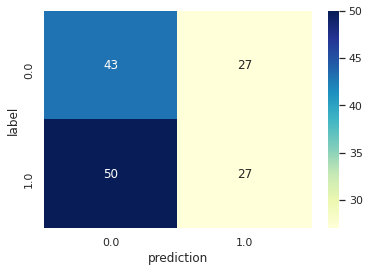

In [21]:
fig = plot_confusion_matrix(train, results)
fig.savefig("figures/{}-{}-train-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train ROC curve

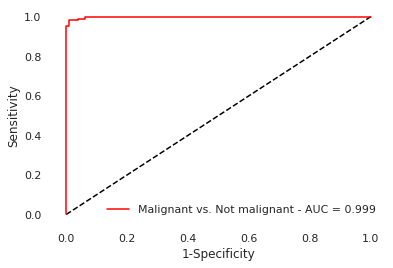

In [99]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-train-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Train precision-recall curve

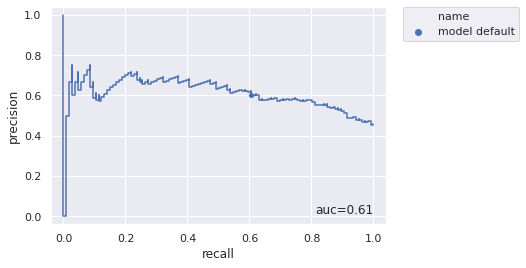

In [30]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-train-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Validation

In [100]:
results = get_results(model, validation)

In [101]:
probabilities = transform_binary_probabilities(results)
predictions = transform_binary_predictions(results)
labels = get_labels(validation)
pm.record("validation_labels", list(labels))
pm.record("validation_probabilities", list(probabilities))
pm.record("validation_predictions", list(predictions))

## Validation statistics

In [102]:
loss, accuracy = calculate_accuracy_loss(model, validation)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.611940324306488
Loss: 27.309444427490234


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.612,33,8,22,4,0.892,0.267,0.600,0.667,0.733,0.108,0.400,0.579,0.488
1.000,0.612,8,33,4,22,0.267,0.892,0.667,0.600,0.108,0.733,0.333,0.579,0.488


## Validation confusion matrix

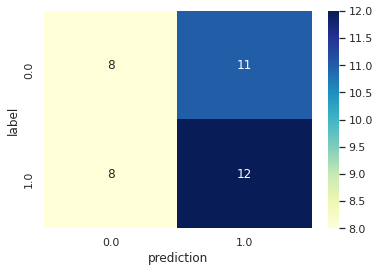

In [47]:
fig = plot_confusion_matrix(validation, results)
fig.savefig("figures/{}-{}-validation-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation ROC curve

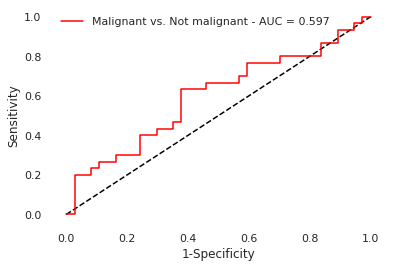

In [103]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-validation-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Validation precision-recall curve

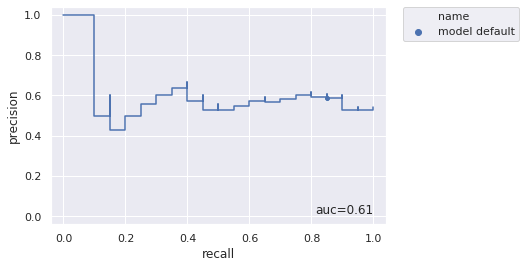

In [26]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-validation-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

# Test

In [18]:
results = get_results(model, test)

In [19]:
probabilities = transform_binary_probabilities(results)
print(probabilities)
predictions = transform_binary_predictions(results)
print(predictions)
labels = get_labels(test)
names = test.names
test_results = [['PatientID','True label','Predicted label','Probability']]
index = 0
for name in names:
    test_results.append([name, labels[index], predictions[index], probabilities[index]])
    index += 1
df = pandas.DataFrame(test_results)
df.to_csv("output/test_results/{}-{}.csv".format(UUID, result.model), header=False, index=False)
pm.record("test_labels", list(labels))
pm.record("test_probabilities", list(probabilities))
pm.record("test_predictions", list(predictions))

[0.1916939  0.31581914 0.12757164 0.11615911 0.15541488 0.2287324
 0.15341896 0.12313446 0.13100061 0.11317337 0.2081126  0.7660811
 0.11974704 0.1436578  0.1568189  0.14565396 0.14132729 0.79017305
 0.92591    0.16381863 0.13694942 0.4006838  0.83730066 0.83545274
 0.1875425  0.74368554 0.612756   0.14660516 0.19595248 0.22869468
 0.3086704  0.6854812  0.5447386  0.88331485 0.88617074 0.48397365
 0.521378   0.54115754 0.54759324 0.6472583  0.3424335  0.21433961
 0.15269005 0.87775725 0.23528612 0.74875146 0.83323157 0.89088976
 0.88678896 0.46660444 0.8192401  0.46308482 0.20431012 0.82726914
 0.51158625 0.8597954  0.806044   0.2399762  0.8609556  0.75142574
 0.130144   0.11037457 0.15069503 0.7188884  0.7278668  0.12119171
 0.15922055 0.72899103 0.2988041  0.52368313 0.22105467 0.25000578
 0.7716945  0.825459   0.77097845 0.28566393 0.3218221  0.2386227
 0.19063753 0.85002446 0.863881   0.70318854 0.5688487  0.79293317
 0.12285677 0.82275033 0.12314591 0.4583486  0.11924575 0.8320591

## Test statistics

In [20]:
loss, accuracy = calculate_accuracy_loss(model, test)
print("Accuracy:", accuracy)
print("Loss:", loss)
stats = calculate_confusion_matrix_stats(labels, results)
pandas.DataFrame(stats, index=validation.class_indices)

Accuracy: 0.760869562625885
Loss: 5.221632480621338


,Acc,TP,TN,FP,FN,TPR,TNR,PPV,NPV,FPR,FNR,FDR,AM,GM
0.000,0.761,40,30,9,13,0.755,0.769,0.816,0.698,0.231,0.245,0.184,0.762,0.762
1.000,0.761,30,40,13,9,0.769,0.755,0.698,0.816,0.245,0.231,0.302,0.762,0.762


## Test confusion matrix

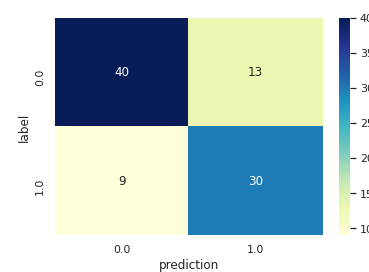

In [21]:
fig = plot_confusion_matrix(test, results)
fig.savefig("figures/{}-{}-test-confusion-matrix.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test ROC curve

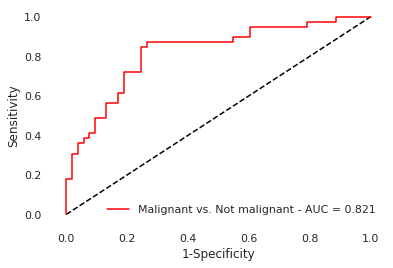

In [22]:
fig = plot_roc_curve(labels, probabilities)
fig.savefig("figures/{}-{}-test-ROC-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

## Test precision-recall curve

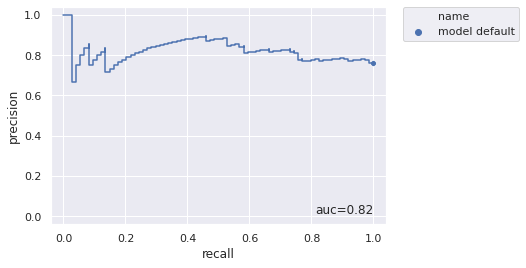

In [23]:
fig = plot_precision_recall(labels, results)
fig.savefig("figures/{}-{}-test-precisionrecall-curve.svg".format(result.uuid, result.input_form), bbox_inches = "tight")

In [24]:
#import json
#hyperparameters = json.loads(result.hyperparameters)
#deep_top = hyperparameters["deep-dense-top"]
#grad_cam_layer = "dense_3"
#if deep_top: 
#    grad_cam_layer = "dense_6"

# Grad Cam

In [28]:
#def show_grad_cam_images(images, labels, predictions, names=None, penultimate_layer="block7b_add_t2", layer="dense_3", columns=2, include_label=True):
#    filter_idx = [0]
#    grad_modifier = None
#    backprop_modifier = None
#    penultimate_layer_idx = None
#    if penultimate_layer:
#        penultimate_layer_idx = find_layer_idx(model, penultimate_layer)    
#    rows = int(math.ceil(len(images) * 2/columns))
#    f, ax = plt.subplots(rows, columns, figsize=(5.5, 3 * rows))    
#    ax = ax.flatten()
#    for i, image in enumerate(images): 
#        grad = visualize_cam(
#            model,
#            find_layer_idx(model, layer),
#            filter_idx,
#            normalize(image),
#            penultimate_layer_idx=penultimate_layer_idx,
#            backprop_modifier=backprop_modifier,
#            grad_modifier=grad_modifier)
#        if names is not None: 
#            ax[2*i].set_title("{}".format(names[i]))
#        ax[2*i].imshow(image)
#        ax[2*i].axis('off')
#        if include_label: 
#            ax[2*i+1].set_title("label/pred: {}/{}".format(labels[i], predictions[i]))
#        ax[2*i+1].imshow(overlay(grad, image))
#        ax[2*i+1].axis('off')
#    return f, ax

[autoreload of tensorboard failed: Traceback (most recent call last):
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/home/user1/anaconda3/lib/python3.6/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/home/user1/anaconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 608, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 205, in _call_with_frames_removed
  File "/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/tensorboard/__init__.py", 

In [30]:
#grad_cam_dataset = test
#grad_cam_dataset.reset()
#grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
#if grad_cam_dataset.parameters["t1"]: 
#    show_grad_cam_images(grad_cam_dataset.t1, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
#    plt.show()
#if grad_cam_dataset.parameters["t2"]: 
#    show_grad_cam_images(grad_cam_dataset.t2, grad_cam_dataset.labels, grad_cam_results, grad_cam_dataset.names, layer=grad_cam_layer)
#    plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f9394908d08> (for post_execute):


KeyboardInterrupt: 

{(0, 1): 'bone-penn-566', (1, 1): 'bone-penn-493', (0, 0): 'bone-penn-557'}


/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
/home/user1/.local/share/virtualenvs/Bone-MRI-iLizu8rs/lib/python3.6/site-packages/ipykernel_launcher.py:48: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


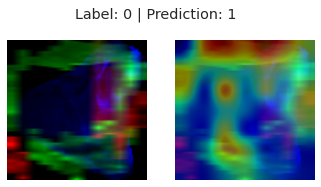

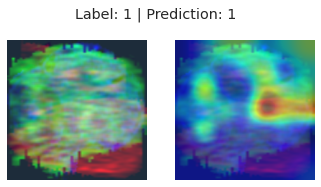

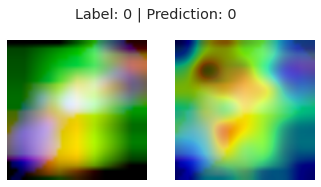

In [35]:
#grad_cam_dataset = test
#grad_cam_dataset.reset()
#grad_cam_results = ["malignant" if i else "benign" for i in transform_binary_predictions(get_results(model, grad_cam_dataset))]
#inv_indices = {v: k for k, v in grad_cam_dataset.class_indices.items()}

#if SELECTIONS == None: 
#    SELECTIONS = dict()
    
#predictions = transform_binary_predictions(results)
#labels = get_labels(test)
#names = test.names
#index = 0
#for name in names:
#    SELECTIONS[(labels[index],predictions[index])] = name
#    index += 1
#print(SELECTIONS)

#if grad_cam_dataset.parameters["t1"]:
#    for k, v in SELECTIONS.items():
#        images = grad_cam_dataset.t1
#        selected_images = list()
#        selected_labels = list()
#        selected_results = list()
#        for i, name in enumerate(grad_cam_dataset.names): 
#            if name in v: 
#                selected_images.append(images[i])
#                selected_labels.append(grad_cam_dataset.labels[i])
#                selected_results.append(grad_cam_results[i])            
#        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, include_label=False, names=None, layer=grad_cam_layer)
#        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
#        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])                
#        fig.show()

#if grad_cam_dataset.parameters["t2"]: 
#    for k, v in SELECTIONS.items():
#        images = grad_cam_dataset.t2
#        selected_images = list()
#        selected_labels = list()
#        selected_results = list()
#        for i, name in enumerate(grad_cam_dataset.names): 
#            if name in v: 
#                selected_images.append(images[i])
#                selected_labels.append(grad_cam_dataset.labels[i])
#                selected_results.append(grad_cam_results[i])
#        fig, ax = show_grad_cam_images(selected_images, selected_labels, selected_results, names=None, include_label=False, layer=grad_cam_layer)
#        title = fig.suptitle("Label: {} | Prediction: {}".format(k[0], k[1]))
#        fig.savefig("figures/{}-{}-grad-cam-{}-{}.svg".format(result.description, result.input_form, k[0], k[1]), bbox_inches = "tight", bbox_extra_artists=[title])        
#        fig.show()

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')